In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
class NaiveBayesClassifier():
    def fit(self, predictors,target):
        self.data=predictors
        self.target=target
        self.ndata, self.npred=predictors.shape
        self.ntarget=len(set(target))
        self.priors=np.unique(target, return_counts=True)[1]/self.ntarget
        self.mean_pred=np.zeros((self.ntarget,self.npred))
        self.std_pred=np.zeros((self.ntarget,self.npred))
        for i in range(self.ntarget):
            self.mean_pred[i,:]=predictors.iloc[target[target==np.unique(target)[i]].index].mean(axis=0)
            self.std_pred[i,:]=((predictors.iloc[target[target==np.unique(target)[i]].index]-self.mean_pred[i])**2).mean(axis=0)
    def predict(self, data):
        target=np.zeros(self.ndata)
        for i in range(self.ndata):
            prob=np.zeros(self.ntarget)
            for j in range(self.ntarget):
                prob[j]=np.prod(stats.norm.pdf((data.iloc[i,:]-self.mean_pred[j,:])/self.std_pred[j,:])*self.priors[j])
            target[i]=prob.argmax(axis=0)
        return target

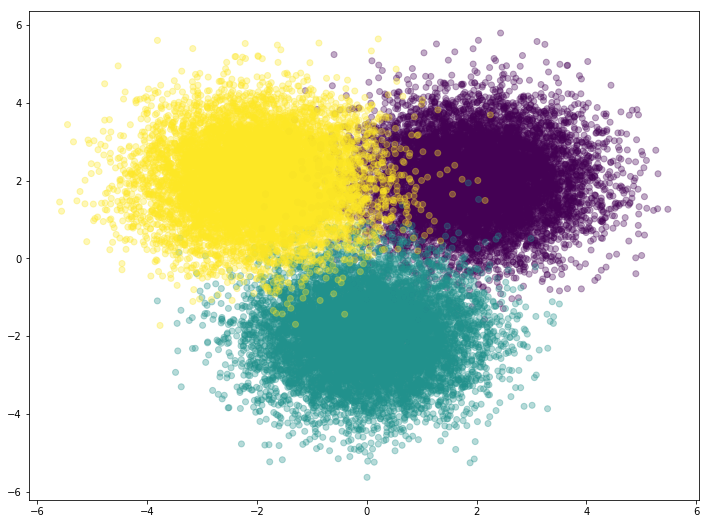

In [3]:
D = 2
K = 3
N = int(K*1e4)

X0 = np.random.randn((N//K),D) + np.array([2,2])
X1 = np.random.randn((N//K),D) + np.array([0,-2])
X2 = np.random.randn((N//K),D) + np.array([-2,2])
X = np.vstack((X0,X1,X2))

y = np.array([0]*(N//K) + [1]*(N//K) + [2]*(N//K))

plt.figure(figsize = (12,9))
plt.scatter(X[:,0],X[:,1],c = y,alpha = 0.3333)

In [4]:
data=pd.DataFrame(X)

In [5]:
data['y']=y

In [6]:
nbc=NaiveBayesClassifier()

In [7]:
nbc.fit(data.drop('y',axis=1),data.y)

In [8]:
predictions=nbc.predict(data.drop('y',axis=1))

In [9]:
(predictions==data.y).mean()

0.9691333333333333